# Vector Space Models

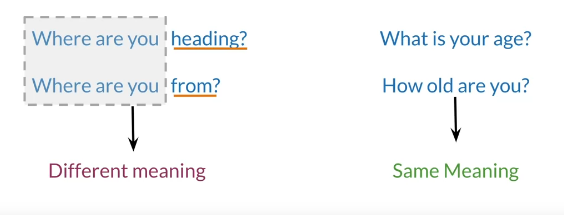

Suponha que você tenha duas perguntas. A primeira é: "Where are you heading" E a segunda é: "Where are you from?" Essas frases têm palavras idênticas, exceto pela última. No entanto, ambas têm significados diferentes. Por outro lado, suponha que você tenha mais duas perguntas cujas palavras são completamente diferentes, mas ambas as frases significam a mesma coisa. Os modelos de espaço vetorial ajudarão você a identificar se o primeiro par de perguntas ou o segundo par são semelhantes em significado, mesmo que não compartilhem as mesmas palavras. Eles podem ser usados para identificar similaridade em resposta a perguntas, paráfrases e sumarização.

Os modelos de espaço vetorial também permitirão capturar dependências entre palavras. Considere esta frase: "Você come cereal de uma tigela". Aqui você pode ver que as palavras "cereal" e "tigela" estão relacionadas. Agora vamos olhar para esta outra frase: "Você compra algo e alguém mais o vende". O que está dizendo é que alguém vende algo porque outra pessoa compra. A segunda metade da frase depende da primeira metade. Com modelos baseados em vetores, você poderá capturar isso e muitos outros tipos de relacionamentos entre diferentes conjuntos de palavras.

Os modelos de espaço vetorial são usados na extração de informações para responder a perguntas, no estilo de "quem", "o quê", "onde", "como", etc. Também são usados em tradução automática e em programação de esportes de xadrez. Eles também são usados em muitas outras aplicações.

Como um pensamento final, gostaria de compartilhar com você esta citação de John Firth, um famoso linguista inglês: "Você deve conhecer uma palavra pela companhia que ela mantém". Este é um dos conceitos mais fundamentais em PLN. Ao usar modelos de espaço vetorial, a maneira como as representações são feitas é identificando o contexto ao redor de cada palavra no texto, e isso captura o significado relativo. Eureka, os modelos de espaço vetorial permitem representar palavras e documentos como vetores. Isso captura o significado relativo. Você aprende sobre modelos de espaço vetorial e vê diferentes tipos de aplicações onde esses modelos são usados.

# Word by Word and Word by Doc.

Para obter um modelo de espaço vetorial usando um design palavra-por-palavra, você criará uma matriz de coocorrência e extrairá vetores de apresentações para as palavras em seu corpus. Você poderá obter um modelo de espaço vetorial usando um design palavra-por-documento de uma maneira semelhante. Finalmente, vou mostrar como, em um espaço vetorial, você pode encontrar relações entre palavras e vetores, também conhecidas como similaridade.

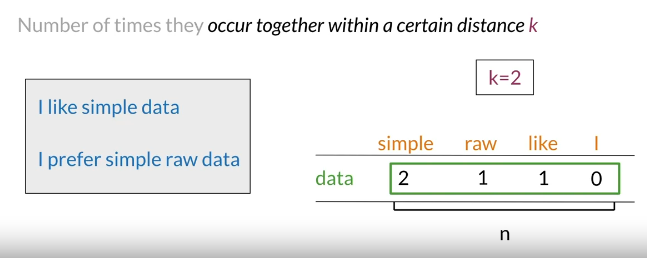

A coocorrência de duas palavras diferentes é o número de vezes que elas aparecem juntas em seu corpus dentro de uma certa distância de palavras k. Por exemplo, suponha que seu corpus tenha as seguintes duas frases. A linha da matriz de coocorrência correspondente à palavra "data" com um valor k igual a 2, seria preenchida com os seguintes valores. Para a coluna correspondente à palavra "simple", você obteria um valor igual a 2, porque "data" e "simple" coocorrem na primeira frase dentro de uma distância de uma palavra e na segunda frase dentro de uma distância de duas palavras. A linha da matriz de coocorrência correspondente à palavra "data" ficaria assim se você considerar a coocorrência com as palavras "simple", "raw", "like" e "I". Neste caso, a representação vetorial da palavra "data" seria igual a [2, 1, 1, 0].

Com um design palavra-por-palavra, você pode obter uma representação com n entradas, com n entre um e o tamanho do seu vocabulário total. Para um design palavra-por-documento, o processo é bastante semelhante. Nesse caso, você contará as vezes que palavras do seu vocabulário aparecem em documentos que pertencem a categorias específicas. Por exemplo, você poderia ter um corpus composto por documentos sobre diferentes tópicos como entretenimento, economia e aprendizado de máquina. Aqui, você teria que contar o número de vezes que suas palavras aparecem nos documentos que pertencem a cada uma das três categorias.

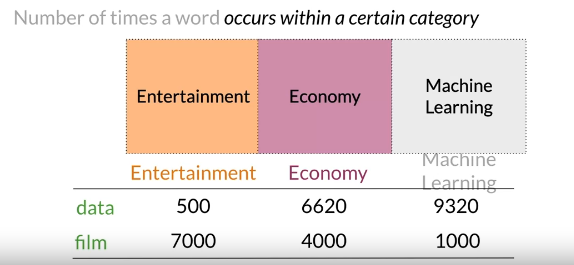

Neste exemplo, suponha que a palavra "data" apareça 500 vezes em documentos do seu corpus relacionados a entretenimento, 6.620 vezes em documentos de economia e 9.320 em documentos relacionados ao aprendizado de máquina. A palavra "film" aparece em cada categoria de documento, 7.000, 4.000 e 1.000 vezes, respectivamente. Consegue perceber para onde isso está indo? Uma vez que você construiu as representações para múltiplos conjuntos de documentos ou palavras, você terá seu espaço vetorial.

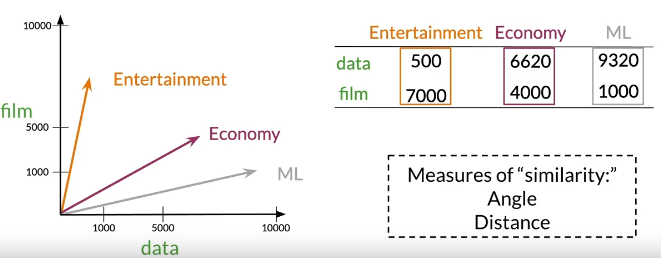

Vamos pegar a matriz do último exemplo. Aqui, você poderia pegar uma representação para as palavras "data" e "film" das linhas da tabela. No entanto, pegarei a representação para cada categoria de documentos olhando para as colunas. O espaço vetorial terá duas dimensões: o número de vezes que as palavras "data" e "film" aparecem nos tipos de documentos. Para o corpus de entretenimento, você teria as seguintes representações vetoriais. Note que, nesse espaço, é fácil ver que os documentos de economia e aprendizado de máquina são muito mais semelhantes entre si do que em relação à categoria de entretenimento.

# Linear algebra in Python with Numpy

In [1]:
import numpy as np

## Definindo listas e arrays numpy

In [2]:
alist = [1, 2, 3, 4, 5]   # Defina uma lista Python. Parece um array np
narray = np.array([1, 2, 3, 4]) # Defina um array numpy

# Note a diferença entre uma lista Python e um array NumPy.
print(alist)
print(narray)

print(type(alist))
print(type(narray))

[1, 2, 3, 4, 5]
[1 2 3 4]
<class 'list'>
<class 'numpy.ndarray'>


## Operadores algébricos em arrays NumPy vs. listas Python

Um dos erros comuns dos iniciantes é misturar os conceitos de arrays NumPy e listas Python. Observe o próximo exemplo, onde adicionamos dois objetos dos dois tipos mencionados. Note que o operador '+' em arrays NumPy realiza uma adição elemento a elemento, enquanto a mesma operação em listas Python resulta em uma concatenação de listas. Tenha cuidado ao codificar. Saber disso pode salvar muitas dores de cabeça.


In [3]:
print(narray + narray)
print(alist + alist)

[2 4 6 8]
[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]


É o mesmo com o operador de produto, `*`. No primeiro caso, escalamos o vetor, enquanto no segundo caso, concatenamos três vezes a mesma lista.


In [4]:
print(narray * 3)
print(alist * 3)

[ 3  6  9 12]
[1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5]


Esteja ciente da diferença porque, dentro da mesma função, ambos os tipos de arrays podem aparecer.
Os arrays do NumPy são projetados para operações numéricas e matriciais, enquanto as listas são para propósitos mais gerais.

## Matriz ou Array de Arrays

Em álgebra linear, uma matriz é uma estrutura composta por n linhas e m colunas. Isso significa que cada linha deve ter o mesmo número de colunas. Com o NumPy, temos duas maneiras de criar uma matriz:
* Criando um array de arrays usando `np.array` (recomendado). 
* Criando uma matriz usando `np.matrix` (ainda disponível, mas pode ser removido em breve).

Arrays ou listas do NumPy podem ser usados para inicializar uma matriz, mas a matriz resultante será composta apenas de arrays NumPy.


In [6]:
npmatrix1 = np.array([narray, narray, narray]) # Matriz inicializada com arrays NumPy
npmatrix2 = np.array([alist, alist, alist]) # Matriz inicializada com listas
npmatrix3 = np.array([narray, [1, 1, 1, 1], narray]) # Matriz inicializada com ambos os tipos

print(npmatrix1)
print(npmatrix2)
print(npmatrix3)

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
[[1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]]
[[1 2 3 4]
 [1 1 1 1]
 [1 2 3 4]]


No entanto, ao definir uma matriz, certifique-se de que todas as linhas contêm o mesmo número de elementos. Caso contrário, as operações de álgebra linear podem levar a resultados inesperados.

Analise os dois exemplos a seguir:


In [7]:
# Exemplo 1:
okmatrix = np.array([[1, 2], [3, 4]]) # Define uma matriz 2x2
print(okmatrix) # Imprime okmatrix
print(okmatrix * 2) # Imprime uma versão escalonada de okmatrix

[[1 2]
 [3 4]]
[[2 4]
 [6 8]]


In [12]:
# Exemplo 2:
badmatrix = np.array([[1, 2], [3, 4], [5, 6, 7]]) # Define uma matriz. Observe que a terceira linha contém 3 elementos
print(badmatrix) # Imprime a matriz malformada
print(badmatrix * 2) # Supõe-se que escala toda a matriz, mas não funciona

[list([1, 2]) list([3, 4]) list([5, 6, 7])]
[list([1, 2, 1, 2]) list([3, 4, 3, 4]) list([5, 6, 7, 5, 6, 7])]


C:\Users\arthu\AppData\Local\Temp\ipykernel_1956\2707106571.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  badmatrix = np.array([[1, 2], [3, 4], [5, 6, 7]]) # Define uma matriz. Observe que a terceira linha contém 3 elementos



## Escalonamento e translação de matrizes

Agora que você sabe como construir arrays e matrizes NumPy corretos, vamos ver como é fácil operar com eles em Python usando os operadores algébricos regulares como + e -.

As operações podem ser realizadas entre arrays e arrays ou entre arrays e escalares.

In [9]:
# Escalar por 2 e transladar 1 unidade a matriz
result = okmatrix * 2 + 1 # Para cada elemento na matriz, multiplica por 2 e adiciona 1
print(result)

# Adicionar duas matrizes compatíveis
result1 = okmatrix + okmatrix
print(result1)

# Subtrair duas matrizes compatíveis. Isso é chamado de vetor diferença
result2 = okmatrix - okmatrix
print(result2)

[[3 5]
 [7 9]]
[[2 4]
 [6 8]]
[[0 0]
 [0 0]]


O operador de produto `*` quando usado em arrays ou matrizes indica multiplicações elemento a elemento.
Não o confunda com o produto escalar.

In [10]:
result = okmatrix * okmatrix # Multiplica cada elemento por si mesmo
print(result)

[[ 1  4]
 [ 9 16]]


## Transpor uma matriz

Na álgebra linear, a transposição de uma matriz é uma operação que inverte uma matriz sobre sua diagonal, ou seja, a operação de transposição troca os índices de linha e coluna da matriz, produzindo outra matriz. Se a dimensão da matriz original for n por m, a matriz transposta resultante será m por n.

**T** denota as operações de transposição com matrizes NumPy.

In [13]:
matrix3x2 = np.array([[1, 2], [3, 4], [5, 6]]) # Define uma matriz 3x2
print('Matriz original 3 x 2')
print(matrix3x2)
print('Matriz transposta 2 x 3')
print(matrix3x2.T)

Matriz original 3 x 2
[[1 2]
 [3 4]
 [5 6]]
Matriz transposta 2 x 3
[[1 3 5]
 [2 4 6]]


No entanto, observe que a operação de transposição não afeta arrays 1D.

In [14]:
nparray = np.array([1, 2, 3, 4]) # Define um array
print('Array original')
print(nparray)
print('Array transposto')
print(nparray.T)

Array original
[1 2 3 4]
Array transposto
[1 2 3 4]


Talvez neste caso você quisesse fazer:

In [15]:
nparray = np.array([[1, 2, 3, 4]]) # Define uma matriz 1 x 4. Note o nível 2 de colchetes
print('Array original')
print(nparray)
print('Array transposto')
print(nparray.T)

Array original
[[1 2 3 4]]
Array transposto
[[1]
 [2]
 [3]
 [4]]


## Obter a norma de um nparray ou matriz

Na álgebra linear, a norma de um vetor n-dimensional $\vec{a}$ é definida como:

$$ \text{norm}(\vec{a}) = ||\vec{a}|| = \sqrt{\sum_{i=1}^{n} a_i^2} $$

Calcular a norma de um vetor ou até mesmo de uma matriz é uma operação geral ao lidar com dados. O Numpy possui um conjunto de funções para álgebra linear no subpacote **linalg**, incluindo a função **norm**. Vamos ver como obter a norma de um array ou matriz dados:

In [16]:
nparray1 = np.array([1, 2, 3, 4]) # Define um array
norm1 = np.linalg.norm(nparray1)

nparray2 = np.array([[1, 2], [3, 4]]) # Define uma matriz 2 x 2. Note o nível 2 de colchetes
norm2 = np.linalg.norm(nparray2) 

print(norm1)
print(norm2)

5.477225575051661
5.477225575051661


Note que sem nenhum outro parâmetro, a função de norma trata a matriz como sendo apenas um array de números.
No entanto, é possível obter a norma por linhas ou por colunas. O parâmetro **axis** controla a forma da operação: 
* **axis=0** significa obter a norma de cada coluna
* **axis=1** significa obter a norma de cada linha

In [17]:
nparray2 = np.array([[1, 1], [2, 2], [3, 3]]) # Define uma matriz 3 x 2

normByCols = np.linalg.norm(nparray2, axis=0) # Obtém a norma de cada coluna. Retorna 2 elementos
normByRows = np.linalg.norm(nparray2, axis=1) # Obtém a norma de cada linha. Retorna 3 elementos

print(normByCols)
print(normByRows)

[3.74165739 3.74165739]
[1.41421356 2.82842712 4.24264069]



No entanto, existem mais maneiras de obter a norma de uma matriz em Python.
Para isso, vejamos todas as diferentes formas de definir o produto escalar entre 2 arrays.

## O produto escalar entre arrays: Todos os sabores

O produto escalar ou produto interno entre dois vetores $\vec{a}$ e $\vec{b}$ do mesmo tamanho é definido como:
$$\vec{a} \cdot \vec{b} = \sum_{i=1}^{n} a_i b_i$$

O produto escalar pega dois vetores e retorna um único número.

In [18]:
nparray1 = np.array([0, 1, 2, 3]) # Define um array
nparray2 = np.array([4, 5, 6, 7]) # Define um array

flavor1 = np.dot(nparray1, nparray2) # Maneira recomendada
print(flavor1)

flavor2 = np.sum(nparray1 * nparray2) # Maneira aceitável
print(flavor2)

flavor3 = nparray1 @ nparray2         # Maneira geek
print(flavor3)

# Como você nunca deve fazer:         # Maneira noob
flavor4 = 0
for a, b in zip(nparray1, nparray2):
    flavor4 += a * b
    
print(flavor4)

38
38
38
38


**Recomenda-se fortemente o uso de np.dot, pois é o único método que aceita arrays e listas sem problemas**

In [19]:
norm1 = np.dot(np.array([1, 2]), np.array([3, 4])) # Produto escalar em nparrays
norm2 = np.dot([1, 2], [3, 4]) # Produto escalar em listas Python

print(norm1, '=', norm2)

11 = 11


Finalmente, note que a norma é a raiz quadrada do produto escalar do vetor consigo mesmo. Isso oferece muitas opções para escrever essa função:

$$ norm(\vec a) = ||\vec a|| = \sqrt {\sum_{i=1}^{n} a_i ^ 2} = \sqrt {a \cdot a} $$

## Somatórios por linhas ou colunas

Outra operação geral realizada em matrizes é a soma por linhas ou colunas.
Assim como fizemos para a função norma, o parâmetro **axis** controla a forma da operação:
* **axis=0** significa somar os elementos de cada coluna juntos. 
* **axis=1** significa somar os elementos de cada linha juntos.

In [20]:
nparray2 = np.array([[1, -1], [2, -2], [3, -3]]) # Define uma matriz 3 x 2

sumByCols = np.sum(nparray2, axis=0) # Obtém a soma de cada coluna. Retorna 2 elementos
sumByRows = np.sum(nparray2, axis=1) # Obtém a soma de cada linha. Retorna 3 elementos

print('Soma por colunas: ')
print(sumByCols)
print('Soma por linhas:')
print(sumByRows)

Soma por colunas: 
[ 6 -6]
Soma por linhas:
[0 0 0]


## Obter a média por linhas ou colunas

Assim como nas somas, é possível obter a **média** por linhas ou colunas usando o parâmetro **axis**. Apenas lembre-se que a média é a soma dos elementos dividida pelo comprimento do vetor:
$$ mean(\vec a) = \frac {\sum_{i=1}^{n} a_i }{n} $$

In [21]:
nparray2 = np.array([[1, -1], [2, -2], [3, -3]]) # Define uma matriz 3 x 2. Escolhida para ser uma matriz com média 0

mean = np.mean(nparray2) # Obtém a média de toda a matriz
meanByCols = np.mean(nparray2, axis=0) # Obtém a média de cada coluna. Retorna 2 elementos
meanByRows = np.mean(nparray2, axis=1) # Obtém a média de cada linha. Retorna 3 elementos

print('Média da matriz: ')
print(mean)
print('Média por colunas: ')
print(meanByCols)
print('Média por linhas:')
print(meanByRows)

Média da matriz: 
0.0
Média por colunas: 
[ 2. -2.]
Média por linhas:
[0. 0. 0.]


## Centralizar as colunas de uma matriz

Centralizar os atributos de uma matriz de dados é outro passo essencial de pré-processamento. Centralizar uma matriz significa subtrair a média da coluna de cada elemento dentro da coluna. A média por colunas de uma matriz centralizada é sempre 0.

Com o NumPy, esse processo é tão simples quanto isto:


In [22]:
nparray2 = np.array([[1, 1], [2, 2], [3, 3]]) # Define uma matriz 3 x 2. 

nparrayCentered = nparray2 - np.mean(nparray2, axis=0) # Remove a média de cada coluna

print('Matriz original')
print(nparray2)
print('Matriz centralizada por colunas')
print(nparrayCentered)

print('Nova média por coluna')
print(nparrayCentered.mean(axis=0))

Matriz original
[[1 1]
 [2 2]
 [3 3]]
Matriz centralizada por colunas
[[-1. -1.]
 [ 0.  0.]
 [ 1.  1.]]
Nova média por coluna
[0. 0.]


**Aviso:** Este processo não se aplica para centralização por linhas. Em tais casos, considere transpor a matriz, centralizar por colunas e, em seguida, transpor de volta o resultado.

Veja o exemplo abaixo:

In [23]:
nparray2 = np.array([[1, 3], [2, 4], [3, 5]]) # Define uma matriz 3 x 2. 

nparrayCentered = nparray2.T - np.mean(nparray2, axis=1) # Remove a média de cada linha
nparrayCentered = nparrayCentered.T # Transpõe de volta o resultado

print('Matriz original')
print(nparray2)
print('Matriz centralizada por linhas')
print(nparrayCentered)

print('Nova média por linhas')
print(nparrayCentered.mean(axis=1))

Matriz original
[[1 3]
 [2 4]
 [3 5]]
Matriz centralizada por linhas
[[-1.  1.]
 [-1.  1.]
 [-1.  1.]]
Nova média por linhas
[0. 0. 0.]


Observe que algumas operações podem ser realizadas usando funções estáticas como `np.sum()` ou `np.mean()`, ou usando as funções internas do array

In [24]:
nparray2 = np.array([[1, 3], [2, 4], [3, 5]]) 

mean1 = np.mean(nparray2) # Maneira estática
mean2 = nparray2.mean()   # Maneira Dinâmica

print(mean1, ' == ', mean2)

3.0  ==  3.0


Mesmo que sejam equivalentes, é recomendado o uso da forma estática sempre.

# Euclidean Distance

Esta métrica permite identificar quão distantes dois pontos ou dois vetores estão um do outro. Durante este segmento, você calculará a distância Euclidiana entre dois vetores de documentos, como os apresentados, e depois generalizará essa noção para espaços vetoriais em dimensões mais altas. Vamos usar dois dos vetores de corpora que você viu anteriormente. Lembre-se que naquele exemplo, havia duas dimensões: o número de vezes que a palavra "data" e a palavra "film" apareceram no corpus. O Corpus A será o corpus de entretenimento e o Corpus B será o corpus de aprendizado de máquina. Agora, vamos representar esses vetores como pontos no espaço vetorial. A distância Euclidiana é o comprimento do segmento de linha reta que os conecta.

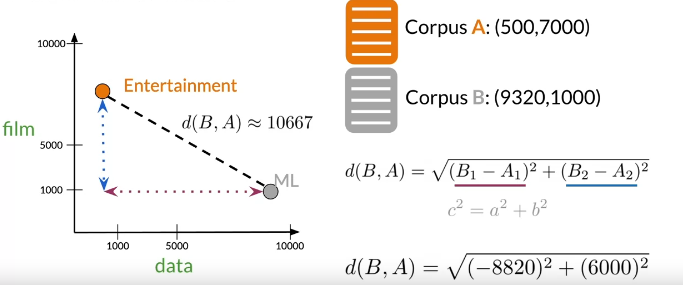

Para obter esse valor, você deve usar a seguinte fórmula: o primeiro termo é a distância horizontal ao quadrado e o segundo termo é a distância vertical ao quadrado. Como você pode ver, esta fórmula é um exemplo do teorema de Pitágoras. Se você resolver cada um dos termos da equação, chegará a esta expressão e, por fim, obterá uma distância Euclidiana aproximadamente igual a 10.667. Quando você tem dimensões mais altas, a distância Euclidiana não é muito mais difícil de calcular. Vamos passar por um exemplo usando a seguinte matriz de coocorrência.

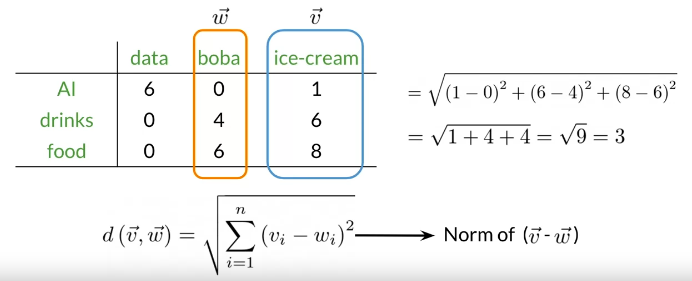

Suponha que você queira saber a distância Euclidiana entre o vetor $v$ da palavra "ice cream" e a representação vetorial $w$ da palavra "the boba". Para começar, você precisa obter a diferença entre cada uma de suas dimensões. Eleve essas diferenças ao quadrado, some-as e, em seguida, tire a raiz quadrada dos seus resultados. Este processo é a generalização do mostrado na última lâmina. Esta é a fórmula que você usaria para obter a distância Euclidiana entre representações vetoriais em um espaço vetorial de $n$ dimensões. Se você se lembra de álgebra, essa fórmula é conhecida como a norma da diferença entre os vetores que você está comparando.

# Cosine Similarity: Intuition

Basicamente, ela utiliza o cosseno do ângulo entre dois vetores. Com base nisso, ela informa se dois vetores estão próximos ou não. Nesta seção, você verá o problema de usar a distância Euclidiana, especialmente ao comparar representações vetoriais de documentos ou corpora, e como a métrica de similaridade do cosseno pode ajudar a superar esse problema.

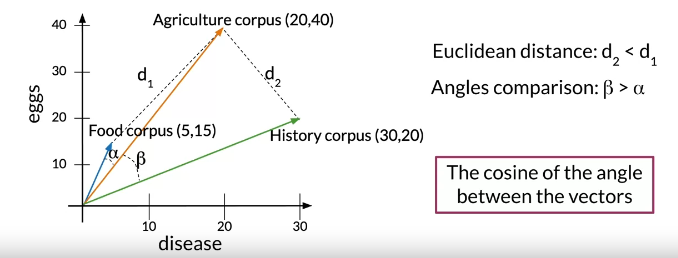

Para ilustrar como a distância Euclidiana pode ser problemática, vamos tomar o seguinte exemplo. Suponha que você esteja em um espaço vetorial onde os corpora são representados pela ocorrência das palavras "disease" (doença) e "eggs" (ovos). Aqui está a representação de um corpus de alimentos, um corpus de agricultura e um corpus de história. Cada um desses corpora tem textos relacionados a esses assuntos. Mas você sabe que o total de palavras nos corpora difere um do outro. De fato, os corpora de agricultura e história têm um número semelhante de palavras, enquanto o corpus de alimentos tem um número relativamente pequeno.

Vamos definir a distância Euclidiana entre o corpus de alimentos e o de agricultura como $d_1$ e a distância Euclidiana entre o corpus de agricultura e o de história como $d_2$. Como você pode ver, a distância $d_2$ é menor que a distância $d_1$, o que sugeriria que os corpora de agricultura e história são mais semelhantes entre si do que os corpora de agricultura e alimentos.

Outro método comum para determinar a similaridade entre vetores é calcular o cosseno do ângulo interno entre eles. Se o ângulo for pequeno, o cosseno estará próximo de um. À medida que o ângulo se aproxima de 90 graus, o cosseno se aproxima de zero. Como você pode ver aqui, o ângulo Alfa entre alimentos e agricultura é menor que o ângulo Beta entre agricultura e história. Nesse caso específico, o cosseno desses ângulos é um melhor indicador de similaridade entre essas representações vetoriais do que a distância Euclidiana.

# Cosine Similarity

Agora que você tem a intuição por trás do uso do cosseno do ângulo entre duas representações vetoriais como uma métrica de similaridade, vamos aprofundar na explicação e mostrar como calcular a métrica de similaridade do cosseno. Nesta seção, você obterá o cosseno do ângulo interno de dois vetores. Em seguida, mostrarei como o valor da similaridade do cosseno está relacionado à similaridade das direções de dois vetores.



Primeiro, você precisa relembrar algumas definições de álgebra. A norma de um vetor, ou sua magnitude, é escrita assim: $\| \mathbf{v} \|$. Ela é definida como a raiz quadrada da soma dos quadrados de seus elementos. O produto escalar entre dois vetores é a soma dos produtos entre seus elementos em cada dimensão do espaço vetorial. Vamos dar outra olhada em dois dos corpora da última seção. Lembre-se de que, neste exemplo, você tem um espaço vetorial onde as representações dos corpora são dadas pelo número de ocorrências das palavras "disease" (doença) e "eggs" (ovos). O ângulo entre essas representações vetoriais é denotado por Beta. O corpus de agricultura é representado pelo vetor $\mathbf{v}$, e o corpus de história será o vetor $\mathbf{w}$. O produto escalar entre esses vetores é definido da seguinte forma:

$$ \mathbf{v} \cdot \mathbf{w} = \sum_{i=1}^{n} v_i \cdot w_i $$

A partir dessa equação, você vê que o cosseno do ângulo Beta é igual ao produto escalar entre os vetores dividido pelo produto das duas normas:

$$ \cos(\beta) = \frac{\mathbf{v} \cdot \mathbf{w}}{\|\mathbf{v}\| \cdot \|\mathbf{w}\|} $$

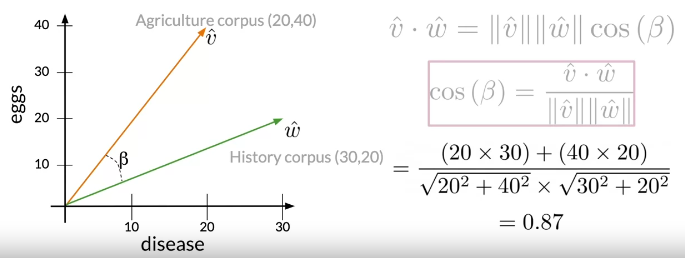

Substituindo os valores reais das representações vetoriais, você deve obter esta expressão. No numerador, você terá o produto entre as ocorrências das palavras "disease" e "eggs", e no denominador, terá o produto entre a norma das representações vetoriais dos corpora de agricultura e história. No final, você deve obter uma similaridade do cosseno de 0,87.

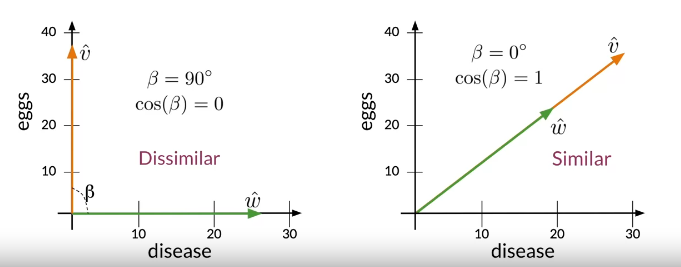

Mas o que essa métrica nos diz sobre a similaridade de dois vetores diferentes? Considere quando dois vetores são ortogonais no espaço vetorial que você conhece até agora. É possível ter apenas valores positivos para qualquer dimensão. O ângulo máximo entre um par de vetores é 90 graus. Nesse caso, o cosseno seria igual a 0, o que significaria que os dois vetores têm direções ortogonais ou que são maximamente dissimilares.

Agora vamos olhar para o caso em que os vetores têm a mesma direção. Nesse caso, o ângulo entre eles é 0 graus e o cosseno é igual a 1, porque o cosseno de 0 é simplesmente 1. Como você pode ver, à medida que o cosseno do ângulo entre dois vetores se aproxima de 1, mais próximas estão suas direções. Agora você sabe como obter a similaridade do cosseno entre qualquer par de vetores. Uma observação importante é que essa métrica é proporcional à similaridade entre as direções dos vetores que você está comparando e, para os espaços vetoriais que você viu até agora, a similaridade do cosseno assume valores entre 0 e 1.

# Manipulating Words in Vector Spaces

Suponha que você tenha um espaço vetorial com países e suas capitais. Você sabe que a capital dos Estados Unidos é Washington DC, mas não sabe qual é a capital da Rússia. No entanto, você gostaria de usar a relação conhecida entre Washington DC e os EUA para descobrir isso. Para isso, você vai usar um pouco de álgebra vetorial. Neste exemplo, você está em um espaço vetorial hipotético bidimensional que tem diferentes representações para diferentes países e capitais.

Primeiro, você terá que encontrar a relação entre as representações vetoriais de Washington DC e dos EUA. Em outras palavras, qual vetor os conecta? Para fazer isso, obtenha a diferença entre os dois vetores. Os valores dessa diferença lhe dirão quantas unidades em cada dimensão você deve mover para encontrar a capital de um país nesse espaço vetorial.

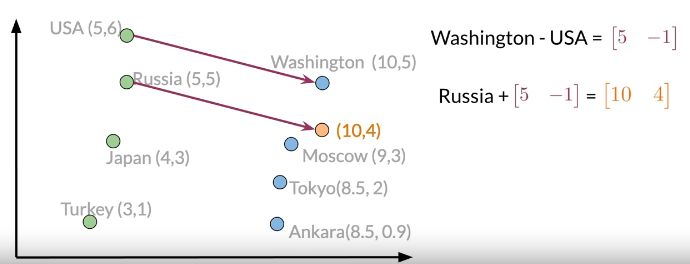

Para encontrar a capital da Rússia, você terá que somar sua representação vetorial com o vetor que você obteve no último passo. No final, você deve deduzir que a capital da Rússia tem uma representação vetorial de (10, 4). No entanto, não há cidades com essa representação exata, então você terá que escolher a mais similar a ela, comparando cada vetor com distâncias Euclidianas ou similaridades do cosseno. Nesse caso, a representação vetorial mais próxima de (10, 4) é a de Moscou. Usando esse processo simples, você poderia ter previsto a capital da Rússia se soubesse a capital dos EUA.

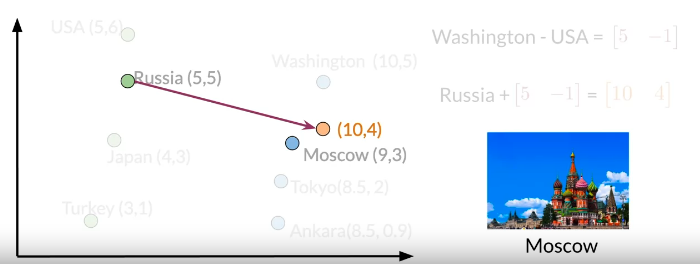

A única ressalva aqui é que você precisa de um espaço vetorial onde as representações capturem o significado relativo das palavras. Agora você tem um processo simples para obter relações desconhecidas entre palavras, usando as relações conhecidas entre outras. Você agora sabe a importância de ter espaços vetoriais onde as representações das palavras capturem seu significado relativo na linguagem natural.

# Manipulating word embeddings

Para começar, vamos carregar as representações vetoriais das palavras e explorar como podemos utilizá-las em operações de álgebra vetorial. Primeiro, carregue o modelo e verifique o número de palavras presentes:

In [26]:
import pandas as pd # Biblioteca para Dataframes
import numpy as np # Biblioteca para funções matemáticas
import pickle # Biblioteca de serialização de objetos Python. Não é segura para dados sensíveis

# Carregar as representações vetoriais das palavras
word_embeddings = pickle.load(open("word_embeddings_subset.p", "rb"))

# Verificar o número de palavras
len(word_embeddings) # Deve haver 243 palavras que serão usadas nesta tarefa

243

Agora que o modelo está carregado, podemos examinar as representações das palavras. Primeiro, note que `word_embeddings` é um dicionário. Cada palavra é a chave de uma entrada, e o valor é sua representação vetorial correspondente. Lembre-se de que colchetes permitem o acesso a qualquer entrada se a chave existir.

Vamos obter a representação vetorial para a palavra "country" (país):

In [27]:
# Obter a representação vetorial para a palavra 'country'
countryVector = word_embeddings['country']

# Imprimir o tipo do vetor
print(type(countryVector)) # Note que é um array numpy

# Imprimir os valores do vetor
print(countryVector) 

<class 'numpy.ndarray'>
[-0.08007812  0.13378906  0.14355469  0.09472656 -0.04736328 -0.02355957
 -0.00854492 -0.18652344  0.04589844 -0.08154297 -0.03442383 -0.11621094
  0.21777344 -0.10351562 -0.06689453  0.15332031 -0.19335938  0.26367188
 -0.13671875 -0.05566406  0.07470703 -0.00070953  0.09375    -0.14453125
  0.04296875 -0.01916504 -0.22558594 -0.12695312 -0.0168457   0.05224609
  0.0625     -0.1484375  -0.01965332  0.17578125  0.10644531 -0.04760742
 -0.10253906 -0.28515625  0.10351562  0.20800781 -0.07617188 -0.04345703
  0.08642578  0.08740234  0.11767578  0.20996094 -0.07275391  0.1640625
 -0.01135254  0.0025177   0.05810547 -0.03222656  0.06884766  0.046875
  0.10107422  0.02148438 -0.16210938  0.07128906 -0.16210938  0.05981445
  0.05102539 -0.05566406  0.06787109 -0.03759766  0.04345703 -0.03173828
 -0.03417969 -0.01116943  0.06201172 -0.08007812 -0.14941406  0.11914062
  0.02575684  0.00302124  0.04711914 -0.17773438  0.04101562  0.05541992
  0.00598145  0.03027344 -0.07

É importante notar que armazenamos cada vetor como um array NumPy. Isso nos permite usar operações de álgebra linear com eles. Os vetores têm um tamanho de 300, enquanto o vocabulário do Google News tem cerca de 3 milhões de palavras!

In [28]:
# Obter o vetor para uma determinada palavra:
def vec(w):
    return word_embeddings[w]

## Operando com embeddings de palavras

Lembre-se de que entender os dados é uma das etapas mais críticas em Ciência de Dados. Os embeddings de palavras são o resultado de processos de aprendizado de máquina e serão parte da entrada para processos futuros. Esses embeddings de palavras precisam ser validados ou pelo menos compreendidos, pois o desempenho do modelo derivado dependerá fortemente de sua qualidade.

Embeddings de palavras são arrays multidimensionais, geralmente com centenas de atributos, o que representa um desafio para sua interpretação.

Na próxima célula, faremos um gráfico bonito para os embeddings de algumas palavras. Mesmo que plotar os pontos dê uma ideia das palavras, as representações com setas ajudam a visualizar o alinhamento dos vetores.

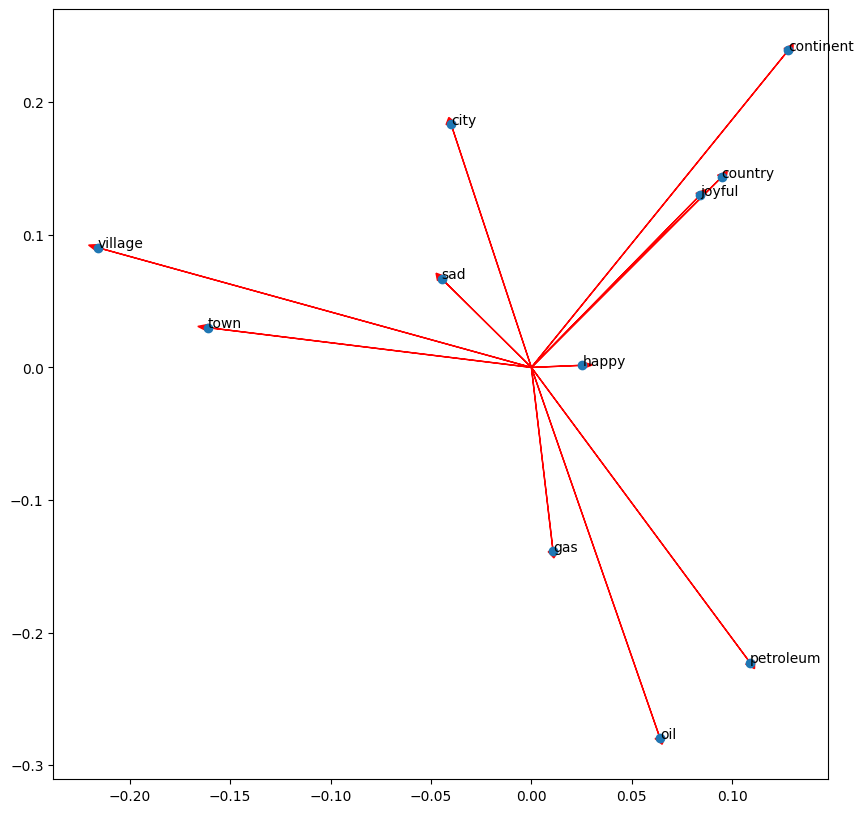

In [29]:
import matplotlib.pyplot as plt # Importar matplotlib
%matplotlib inline

words = ['oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']

bag2d = np.array([vec(word) for word in words]) # Converter cada palavra para sua representação vetorial

fig, ax = plt.subplots(figsize=(10, 10)) # Criar imagem de tamanho personalizado

col1 = 3 # Selecionar a coluna para o eixo x
col2 = 2 # Selecionar a coluna para o eixo y

# Imprimir uma seta para cada palavra
for word in bag2d:
    ax.arrow(0, 0, word[col1], word[col2], head_width=0.005, head_length=0.005, fc='r', ec='r', width=1e-5)

ax.scatter(bag2d[:, col1], bag2d[:, col2]) # Plotar um ponto para cada palavra

# Adicionar o rótulo da palavra sobre cada ponto no gráfico de dispersão
for i in range(len(words)):
    ax.annotate(words[i], (bag2d[i, col1], bag2d[i, col2]))

plt.show()

Observe que palavras semelhantes como 'village' e 'town' ou 'petroleum', 'oil', e 'gas' tendem a apontar na mesma direção. Além disso, note que 'sad' e 'happy' parecem próximas uma da outra; no entanto, os vetores apontam em direções opostas.

Neste gráfico, pode-se perceber os ângulos e distâncias entre as palavras. Algumas palavras estão próximas em ambos os tipos de métricas de distância.

## Distância entre palavras

Agora plotamos as palavras 'sad', 'happy', 'town' e 'village'. Neste mesmo gráfico, exibimos o vetor de 'village' para 'town' e o vetor de 'sad' para 'happy'. Vamos usar o NumPy para essas operações de álgebra linear.

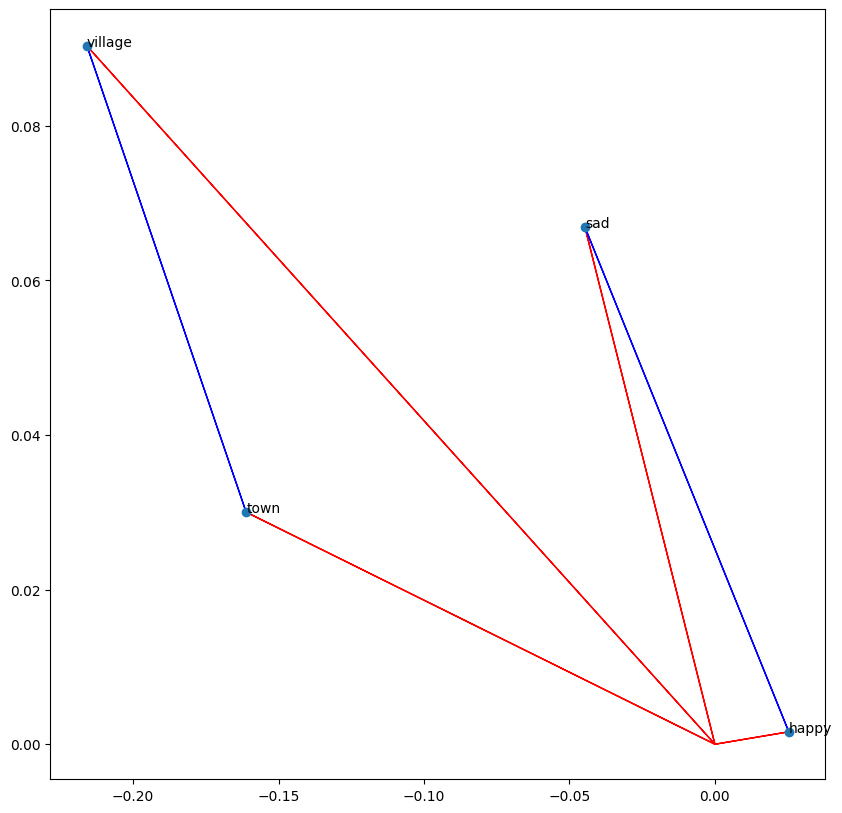

In [30]:
# Definir as palavras a serem plotadas
words = ['sad', 'happy', 'town', 'village']

# Converter cada palavra para sua representação vetorial
bag2d = np.array([vec(word) for word in words])

# Criar imagem de tamanho personalizado
fig, ax = plt.subplots(figsize=(10, 10))

# Selecionar as colunas para os eixos x e y
col1 = 3
col2 = 2

# Imprimir uma seta para cada palavra
for word in bag2d:
    ax.arrow(0, 0, word[col1], word[col2], head_width=0.0005, head_length=0.0005, fc='r', ec='r', width=1e-5)

# Imprimir a diferença vetorial entre 'village' e 'town'
village = vec('village')
town = vec('town')
diff = town - village
ax.arrow(village[col1], village[col2], diff[col1], diff[col2], fc='b', ec='b', width=1e-5)

# Imprimir a diferença vetorial entre 'sad' e 'happy'
sad = vec('sad')
happy = vec('happy')
diff = happy - sad
ax.arrow(sad[col1], sad[col2], diff[col1], diff[col2], fc='b', ec='b', width=1e-5)

# Plotar um ponto para cada palavra
ax.scatter(bag2d[:, col1], bag2d[:, col2])

# Adicionar o rótulo da palavra sobre cada ponto no gráfico de dispersão
for i in range(len(words)):
    ax.annotate(words[i], (bag2d[i, col1], bag2d[i, col2]))

plt.show()

## Álgebra linear em embeddings de palavras

Vimos as analogias entre palavras usando álgebra em embeddings de palavras. Vamos ver como fazer isso em Python com NumPy.

Para começar, obtenha a **norma** de uma palavra no embedding de palavras.


In [31]:
print(np.linalg.norm(vec('town'))) # Imprimir a norma da palavra 'town'
print(np.linalg.norm(vec('sad'))) # Imprimir a norma da palavra 'sad'

2.3858097
2.9004838


## Prevendo capitais

Agora, aplicando a diferença e adição vetorial, pode-se criar uma representação vetorial para uma nova palavra. Por exemplo, podemos dizer que a diferença vetorial entre 'France' e 'Paris' representa o conceito de Capital.

Podemos partir da cidade de Madrid na direção do conceito de Capital e obter algo próximo ao país correspondente ao qual Madrid é a capital.

In [32]:
capital = vec('France') - vec('Paris')
country = vec('Madrid') + capital

print(country[0:5]) # Imprime os primeiros 5 valores do vetor

[-0.02905273 -0.2475586   0.53952026  0.20581055 -0.14862823]



Podemos observar que o vetor 'country' que esperávamos ser o mesmo que o vetor para Espanha não é exatamente isso.


In [33]:
diff = country - vec('Spain')
print(diff[0:10])

[-0.06054688 -0.06494141  0.37643433  0.08129883 -0.13007355 -0.00952148
 -0.03417969 -0.00708008  0.09790039 -0.01867676]


Então, temos que procurar as palavras mais próximas no embedding que correspondem ao país candidato. Se o embedding de palavras funcionar como esperado, a palavra mais similar deve ser 'Spain'. Vamos definir uma função que nos ajude a fazer isso. Vamos armazenar nosso embedding de palavras como um DataFrame, o que facilita as operações de busca baseadas nos vetores numéricos.

In [34]:
# Cria um dataframe a partir do dicionário de embeddings. Isso facilita as operações algébricas
keys = word_embeddings.keys()
data = []
for key in keys:
    data.append(word_embeddings[key])

embedding = pd.DataFrame(data=data, index=keys)
# Define uma função para encontrar a palavra mais próxima de um vetor:
def find_closest_word(v, k = 1):
    # Calcula a diferença vetorial de cada palavra para o vetor de entrada
    diff = embedding.values - v 
    # Obtém a norma L2 ao quadrado de cada vetor de diferença.
    # Isso significa a distância euclidiana ao quadrado de cada palavra para o vetor de entrada
    delta = np.sum(diff * diff, axis=1)
    # Encontra o índice da menor distância no array
    i = np.argmin(delta)
    # Retorna o nome da linha para este item
    return embedding.iloc[i].name

Essa função `find_closest_word` calcula a palavra mais próxima de um vetor específico em um espaço de embeddings, permitindo identificar palavras que são semanticamente próximas com base em suas representações vetoriais.

## Imprimir algumas linhas do embedding como um DataFrame

In [35]:
embedding.head(10)

0         1         2         3         4         5    \
country   -0.080078  0.133789  0.143555  0.094727 -0.047363 -0.023560   
city      -0.010071  0.057373  0.183594 -0.040039 -0.029785 -0.079102   
China     -0.073242  0.135742  0.108887  0.083008 -0.127930 -0.227539   
Iraq       0.191406  0.125000 -0.065430  0.060059 -0.285156 -0.102539   
oil       -0.139648  0.062256 -0.279297  0.063965  0.044434 -0.154297   
town       0.123535  0.159180  0.030029 -0.161133  0.015625  0.111816   
Canada    -0.136719 -0.154297  0.269531  0.273438  0.086914 -0.076172   
London    -0.267578  0.092773 -0.238281  0.115234 -0.006836  0.221680   
England   -0.198242  0.115234  0.062500 -0.058350  0.226562  0.045898   
Australia  0.048828 -0.194336 -0.041504  0.084473 -0.114258 -0.208008   

                6         7         8         9    ...       290       291  \
country   -0.008545 -0.186523  0.045898 -0.081543  ... -0.145508  0.067383   
city       0.071777  0.013306 -0.143555  0.011292  ...  0.024292 -0.168945   
China      0.151367 -0.045654 -0.065430  0.034424  ...  0.140625  0.087402   
Iraq       0.117188 -0.351562 -0.095215  0.200195  ... -0.100586 -0.077148   
oil       -0.184570 -0.498047  0.047363  0.110840  ... -0.195312 -0.345703   
town       0.039795 -0.196289 -0.039307  0.067871  ... -0.007935 -0.091797   
Canada    -0.018677  0.006256  0.077637 -0.211914  ...  0.105469  0.030762   
London    -0.251953 -0.055420  0.020020  0.149414  ... -0.008667 -0.008484   
England   -0.062256 -0.202148  0.080566  0.021606  ...  0.135742  0.109375   
Australia -0.164062 -0.269531  0.079102  0.275391  ...  0.021118  0.171875   

                292       293       294       295       296       297  \
country   -0.244141 -0.077148  0.047607 -0.075195 -0.149414 -0.044189   
city      -0.062988  0.117188 -0.020508  0.030273 -0.247070 -0.122559   
China      0.152344  0.079590  0.006348 -0.037842 -0.183594  0.137695   
Iraq      -0.123047  0.193359 -0.153320  0.089355 -0.173828 -0.054688   
oil        0.217773 -0.091797  0.051025  0.061279  0.194336  0.204102   
town      -0.265625  0.029297  0.089844 -0.049805 -0.202148 -0.079590   
Canada    -0.039307  0.183594 -0.117676  0.191406  0.074219  0.020996   
London    -0.053223  0.197266 -0.296875  0.064453  0.091797  0.058350   
England   -0.121582  0.008545 -0.171875  0.086914  0.070312  0.003281   
Australia  0.042236  0.221680 -0.239258 -0.106934  0.030884  0.006622   

                298       299  
country    0.097168  0.067383  
city       0.076172 -0.234375  
China      0.093750 -0.079590  
Iraq       0.302734  0.105957  
oil        0.235352 -0.051025  
town       0.068848 -0.164062  
Canada     0.285156 -0.257812  
London     0.022583 -0.101074  
England    0.069336  0.056152  
Australia  0.051270 -0.135742  

[10 rows x 300 columns]

Agora, vamos encontrar o nome que corresponde ao nosso país numérico:

In [36]:
find_closest_word(country)

'Spain'

## Prevendo outros países

In [37]:
find_closest_word(vec('Italy') - vec('Rome') + vec('Madrid'))

print(find_closest_word(vec('Berlin') + capital))
print(find_closest_word(vec('Beijing') + capital))

Germany
China


No entanto, nem sempre funciona.

In [38]:
print(find_closest_word(vec('Lisbon') + capital))

Lisbon


## Representar uma sentença como um vetor

Uma frase inteira pode ser representada como um vetor somando todos os vetores de palavras que formam a frase. Vamos ver.


In [39]:
doc = "Spain petroleum city king"
vdoc = [vec(x) for x in doc.split(" ")]
doc2vec = np.sum(vdoc, axis = 0)
doc2vec

array([ 2.87475586e-02,  1.03759766e-01,  1.32629395e-01,  3.33007812e-01,
       -2.61230469e-02, -5.95703125e-01, -1.25976562e-01, -1.01306152e+00,
       -2.18544006e-01,  6.60705566e-01, -2.58300781e-01, -2.09960938e-02,
       -7.71484375e-02, -3.07128906e-01, -5.94726562e-01,  2.00561523e-01,
       -1.04980469e-02, -1.10748291e-01,  4.82177734e-02,  6.38977051e-01,
        2.36083984e-01, -2.69775391e-01,  3.90625000e-02,  4.16503906e-01,
        2.83416748e-01, -7.25097656e-02, -3.12988281e-01,  1.05712891e-01,
        3.22265625e-02,  2.38403320e-01,  3.88183594e-01, -7.51953125e-02,
       -1.26281738e-01,  6.60644531e-01, -7.89794922e-01, -7.04345703e-02,
       -1.14379883e-01, -4.78515625e-02,  4.76318359e-01,  5.31127930e-01,
        8.10546875e-02, -1.17553711e-01,  1.02050781e+00,  5.59814453e-01,
       -1.17187500e-01,  1.21826172e-01, -5.51574707e-01,  1.44531250e-01,
       -7.66113281e-01,  5.36102295e-01, -2.80029297e-01,  3.85986328e-01,
       -2.39135742e-01, -

In [40]:
find_closest_word(doc2vec)

'petroleum'

# Visualization and PCA

Frequentemente, você terá vetores em dimensões muito altas. Você deseja encontrar uma maneira de reduzir a dimensão desses vetores para duas dimensões, para que possa plotá-los em um eixo XY. Agora você aprenderá sobre a análise de componentes principais (PCA), que permitirá fazer isso. Você vai usar a PCA para visualizar representações vetoriais com dimensões mais altas do que as que você viu plotadas até agora.

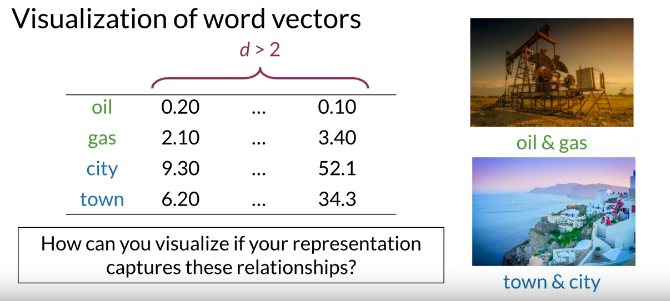

Imagine que você tem a seguinte representação para suas palavras em um espaço vetorial. Nesse cenário, a dimensão do seu espaço vetorial é maior que duas e as palavras "óleo" e "gás" e "cidade" e "vilarejo" estão relacionadas. E você quer ver se essa relação é capturada pela representação de suas palavras. Então, como você poderia visualizar suas palavras para ver isso e outras possíveis relações? A redução de dimensionalidade é uma escolha perfeita para essa tarefa. Quando você tem uma representação de suas palavras em um espaço de alta dimensão, você pode usar um algoritmo como a PCA para obter uma representação em um espaço vetorial com menos dimensões. Se você quiser visualizar seus dados, pode obter uma representação reduzida com três ou menos recursos. Se você realizar a análise de componentes principais em seus dados e obter uma representação bidimensional, poderá então plotar uma visualização de suas palavras.

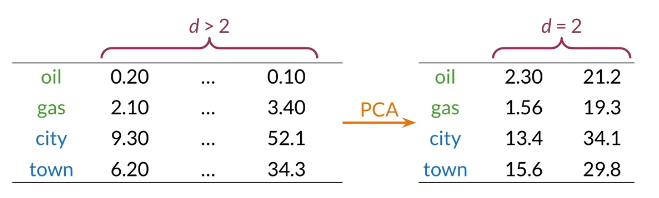

Nesse caso, você pode descobrir que sua representação inicial capturou a relação entre as palavras "óleo" e "gás" e "cidade" e "vilarejo". Porque no seu espaço bidimensional, elas parecem estar agrupadas com palavras relacionadas. Você pode até encontrar outras relações entre suas palavras que não esperava, o que é uma possibilidade divertida e útil. Agora que você sabe o que a PCA pode ajudar a alcançar, vamos detalhar como ela funciona.

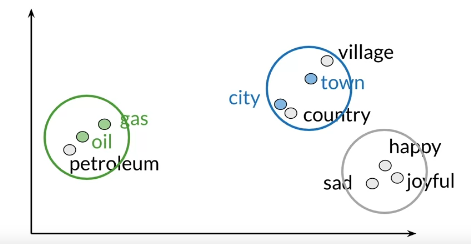

Para simplificar, começarei com um espaço vetorial bidimensional. Digamos que você queira que seus dados sejam representados por um recurso. Usando a PCA, primeiro você encontrará um conjunto de características não correlacionadas e, em seguida, projetará seus dados para um espaço unidimensional tentando reter o máximo de informações possível. Como você pode ver, esse processo é bastante direto. Em seguida, você verá por si mesmo os detalhes de como esse algoritmo funciona junto com como obter características não correlacionadas. Você também projetará seus dados para uma representação em uma dimensão inferior, enquanto retém o máximo de informações possível.

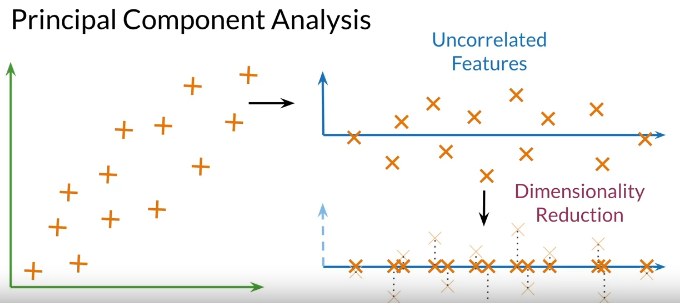

# PCA Algorithm

Primeiro, vou mostrar como obter características não correlacionadas para seus dados e, em seguida, como reduzir as dimensões das representações das suas palavras, tentando manter o máximo de informações possível da sua incorporação original. Para realizar a redução de dimensionalidade usando PCA, comece com seu espaço vetorial original, obtenha características não correlacionadas para seus dados e, finalmente, projete seus dados para um número desejado de características que mantenham a maior quantidade de informação.

Você deve se lembrar da álgebra que matrizes têm autovetores e autovalores. Você não precisa se lembrar de como obtê-los agora, mas deve ter em mente que na PCA, eles são úteis porque os autovetores da matriz de covariância dos seus dados fornecem direções de características não correlacionadas, e os autovalores são as variâncias dos seus conjuntos de dados em cada uma dessas novas características. Para realizar a PCA, você precisará obter os autovetores e autovalores da matriz de covariância dos seus dados.

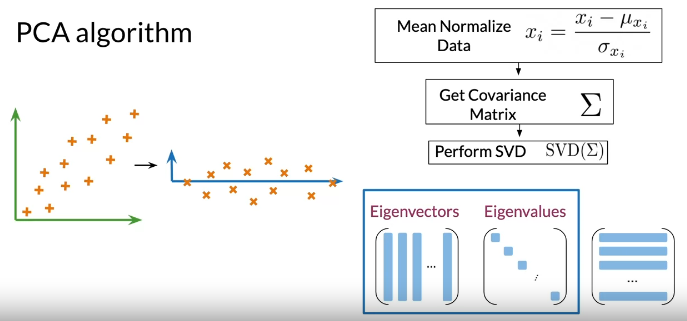

O primeiro passo é obter um conjunto de características não correlacionadas. Para esta etapa, você deve normalizar seus dados, depois obter a matriz de covariância e, finalmente, realizar uma decomposição em valores singulares para obter um conjunto de três matrizes. 

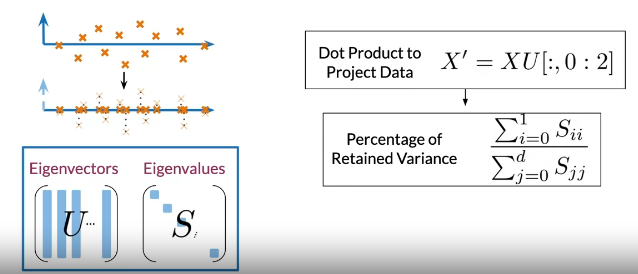

A primeira dessas matrizes contém os autovetores empilhados em colunas e a segunda tem os autovalores na diagonal. A decomposição em valores singulares já está implementada em muitas bibliotecas de programação, então você não precisa se preocupar com como ela funciona. O próximo passo é projetar seus dados em um novo conjunto de características. Você usará os autovetores e autovalores nesta etapa. Vamos denotar os autovetores com U e os autovalores com S. Primeiro, você realizará os produtos internos entre a matriz que contém suas incorporações de palavras e as primeiras n colunas da matriz U, onde N é igual ao número de dimensões que você deseja ter no final. Para visualização, é prática comum ter duas dimensões, então você obterá a porcentagem de variância retida no novo espaço vetorial.

Como uma observação importante, seus autovetores e autovalores devem ser organizados de acordo com os autovalores em ordem decrescente. Essa condição garantirá que você mantenha o máximo de informação possível da sua incorporação original. No entanto, a maioria das bibliotecas já ordena essas matrizes para você. Resumindo, os autovetores da matriz de covariância dos seus dados normalizados fornecem as direções das características não correlacionadas. Os autovalores associados a esses autovetores informam a variância dos seus dados nessas características. Os produtos internos entre suas incorporações de palavras e a matriz de autovetores projetarão seus dados em um novo espaço vetorial da dimensão que você escolher.

# Another explanation about PCA

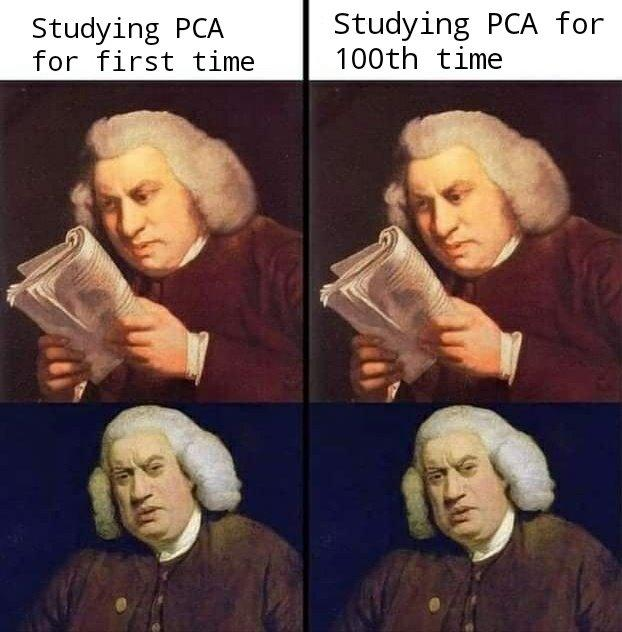

PCA é uma técnica estatística inventada em 1901 por Karl Pearson que usa transformações ortogonais para mapear um conjunto de variáveis em um conjunto de variáveis linearmente não correlacionadas chamadas Componentes Principais.

PCA é baseada na Decomposição em Valores Singulares (SVD) da Matriz de Covariância do conjunto de dados original. Os autovetores de tal decomposição são usados como uma matriz de rotação. Os autovetores são dispostos na matriz de rotação em ordem decrescente de acordo com sua variância explicada. Este último termo está relacionado aos autovalores da SVD.

PCA é uma técnica poderosa com aplicações que variam de simples transformação espacial, redução de dimensionalidade e separação de misturas a partir de informações espectrais.


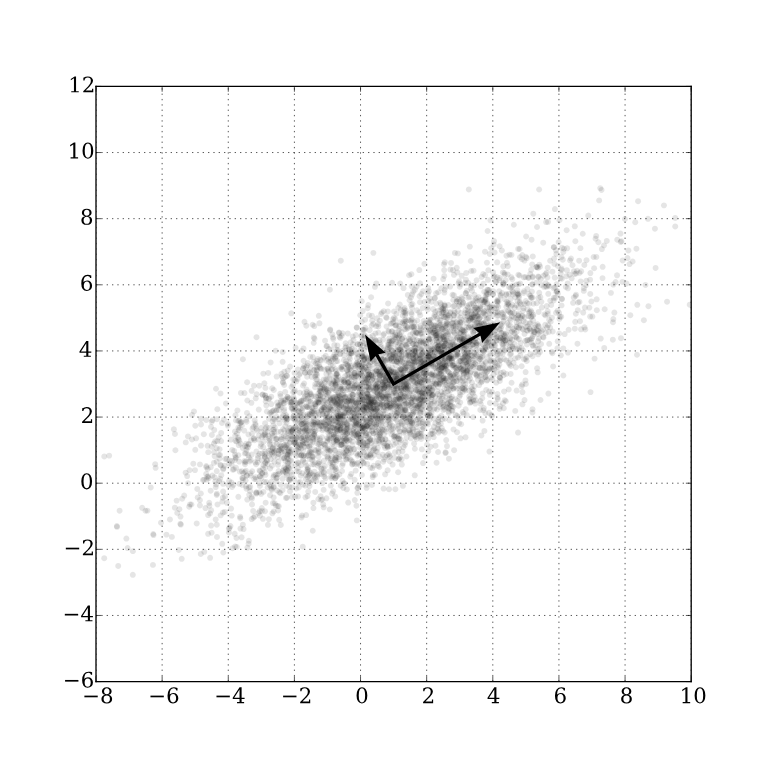

Fonte: [Wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis)

Como de costume, devemos importar as bibliotecas que usaremos neste laboratório.

In [41]:
import numpy as np                         # Biblioteca de álgebra linear
import matplotlib.pyplot as plt            # Biblioteca para visualização
from sklearn.decomposition import PCA      # Biblioteca PCA
import pandas as pd                        # Biblioteca para DataFrames
import math                                # Biblioteca para funções matemáticas
import random                              # Biblioteca para números pseudo-aleatórios

Para começar, considere um par de variáveis aleatórias x e y. Considere o caso base quando y = n * x. As variáveis x e y estarão perfeitamente correlacionadas entre si, uma vez que y é apenas uma escala de x.

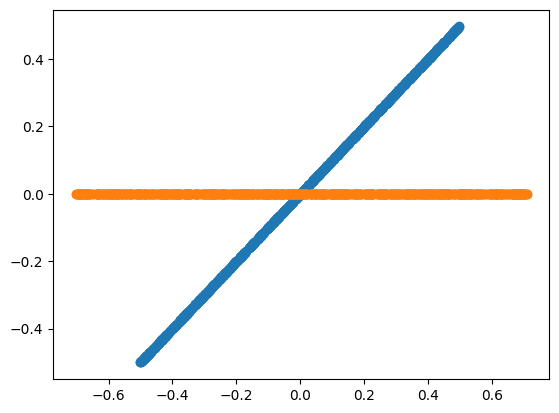

In [42]:
np.random.seed(1)
n = 1  # A quantidade de correlação
x = np.random.uniform(1, 2, 1000)  # Gerar 1000 amostras de uma variável aleatória uniforme
y = x.copy() * n  # Fazer y = n * x

# PCA funciona melhor se os dados forem centrados
x = x - np.mean(x)  # Centralizar x. Remover sua média
y = y - np.mean(y)  # Centralizar y. Remover sua média

data = pd.DataFrame({'x': x, 'y': y})  # Criar um DataFrame com x e y
plt.scatter(data.x, data.y)  # Plotar os dados correlacionados originais em azul

pca = PCA(n_components=2)  # Instanciar uma PCA. Escolher obter 2 variáveis de saída

# Criar o modelo de transformação para esses dados. Internamente, obtém a matriz de rotação
# e a variância explicada
pcaTr = pca.fit(data)

rotatedData = pcaTr.transform(data)  # Transformar os dados com base na matriz de rotação de pcaTr
# Criar um DataFrame com as novas variáveis. Chamamos essas novas variáveis de PC1 e PC2
dataPCA = pd.DataFrame(data=rotatedData, columns=['PC1', 'PC2'])

# Plotar os dados transformados em laranja
plt.scatter(dataPCA.PC1, dataPCA.PC2)
plt.show()

Agora, em que direção as variáveis apontam?

## Compreendendo o modelo de transformação pcaTr

Como mencionado anteriormente, um modelo de PCA é composto por uma matriz de rotação e sua correspondente variância explicada. No próximo módulo, explicaremos os detalhes das matrizes de rotação.

* `pcaTr.components_` possui a matriz de rotação
* `pcaTr.explained_variance_` possui a variância explicada de cada componente principal

In [45]:
print('Autovetores ou componente principal: A primeira linha deve estar na direção de [1, n]')
print(pcaTr.components_)

print()
print('Autovalores ou variância explicada')
print(pcaTr.explained_variance_)

Autovetores ou componente principal: A primeira linha deve estar na direção de [1, n]
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

Autovalores ou variância explicada
[1.66465230e-01 9.30126839e-35]


$$cos(45^o) = 0.7071$$

A matriz de rotação é igual a:

$$R = \begin{bmatrix} \cos(45^o) & \sin(45^o) \\ -\sin(45^o) & \cos(45^o) \end{bmatrix}$$

E $45^o$ é o mesmo ângulo que formam as variáveis \(y = 1 * x\).

Então, a PCA identificou o ângulo em que as variáveis originais apontam.

E a Variância Explicada é em torno de [0.166 0]. Lembre-se de que a Variância de uma variável aleatória uniforme \(x \sim U(1, 2)\), como nosso \(x\) e \(y\), é igual a:

$$Var(x) = \frac {(2 - 1)^2}{12} = 0.083333$$

Então, a variância explicada dada pela PCA pode ser interpretada como

$$[Var(x) + Var(y), \ 0] = [0.0833 + 0.0833, \ 0] = [0.166, \ 0]$$

O que significa que toda a variância explicada do nosso novo sistema é explicada pelo nosso primeiro componente principal.

### Variáveis Aleatórias Normais Correlacionadas

Agora, usaremos um conjunto de dados controlado composto por 2 variáveis aleatórias com diferentes variâncias e com uma covariância específica entre elas. A única maneira que conheço para obter um conjunto de dados assim é, primeiro, criar duas variáveis aleatórias normais independentes com as variâncias desejadas e, em seguida, combiná-las usando uma matriz de rotação. Dessa forma, as novas variáveis resultantes serão uma combinação linear das variáveis aleatórias originais e, portanto, serão dependentes e correlacionadas.

angle:  45.0
rotationMatrix
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


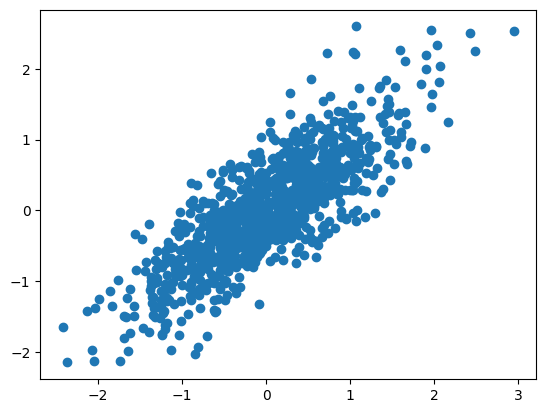

In [46]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

np.random.seed(100)

std1 = 1     # O desvio padrão desejado da nossa primeira variável aleatória
std2 = 0.333 # O desvio padrão desejado da nossa segunda variável aleatória

x = np.random.normal(0, std1, 1000) # Obter 1000 amostras de x ~ N(0, std1)
y = np.random.normal(0, std2, 1000)  # Obter 1000 amostras de y ~ N(0, std2)
#y = y + np.random.normal(0,1,1000)*noiseLevel * np.sin(0.78)

# PCA funciona melhor se os dados forem centrados
x = x - np.mean(x) # Centralizar x
y = y - np.mean(y) # Centralizar y

# Definir um par de variáveis dependentes com uma quantidade desejada de covariância
n = 1 # Magnitude da covariância.
angle = np.arctan(1 / n) # Converter a covariância em um ângulo
print('angle: ',  angle * 180 / math.pi)

# Criar uma matriz de rotação usando o ângulo dado
rotationMatrix = np.array([[np.cos(angle), np.sin(angle)],
                           [-np.sin(angle), np.cos(angle)]])

print('rotationMatrix')
print(rotationMatrix)

xy = np.concatenate(([x] , [y]), axis=0).T # Criar uma matriz com as colunas x e y

# Transformar os dados usando a matriz de rotação. Isso correlaciona as duas variáveis
data = np.dot(xy, rotationMatrix) # Retornar um array nD

# Imprimir os dados rotacionados
plt.scatter(data[:,0], data[:,1])
plt.show()

Vamos imprimir o sistema original e o sistema transformado resultante usando o resultado da PCA no mesmo gráfico, junto com os dois vetores de componentes principais em vermelho e azul.

Autovetores ou componentes principais: A primeira linha deve estar na direção de [1, n]
[[ 0.70827652  0.7059351 ]
 [-0.7059351   0.70827652]]

Autovalores ou variância explicada
[1.09488457 0.11243237]


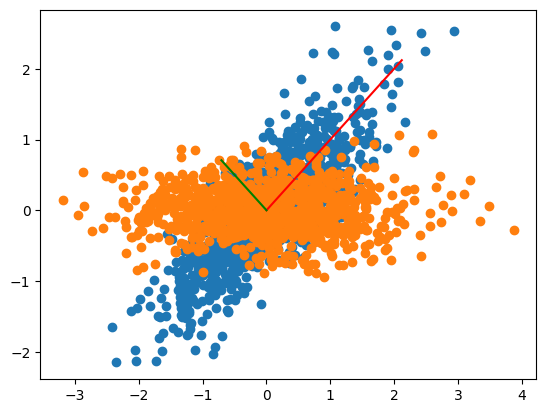

In [50]:
plt.scatter(data[:,0], data[:,1]) # Imprimir os dados originais em azul

# Aplicar PCA. Em teoria, a matriz de autovetores deve ser 
# o inverso da matriz de rotação original.
pca = PCA(n_components=2)  # Instanciar um PCA. Escolher obter 2 variáveis de saída

# Criar o modelo de transformação para esses dados. Internamente, ele obtém a matriz de rotação 
# e a variância explicada
pcaTr = pca.fit(data)

# Criar um array com os dados transformados
dataPCA = pcaTr.transform(data)

print('Autovetores ou componentes principais: A primeira linha deve estar na direção de [1, n]')
print(pcaTr.components_)

print()
print('Autovalores ou variância explicada')
print(pcaTr.explained_variance_)

# Imprimir os dados rotacionados
plt.scatter(dataPCA[:,0], dataPCA[:,1])

# Plotar o primeiro eixo do componente. Usar a variância explicada para escalar o vetor
plt.plot([0, rotationMatrix[0][0] * std1 * 3], [0, rotationMatrix[0][1] * std1 * 3], color='red')
# Plotar o segundo eixo do componente. Usar a variância explicada para escalar o vetor
plt.plot([0, rotationMatrix[1][0] * std2 * 3], [0, rotationMatrix[1][1] * std2 * 3], color='green')

plt.show()

A explicação deste gráfico é a seguinte:
* A matriz de rotação usada para criar nossas variáveis correlacionadas pegou as variáveis originais não correlacionadas `x` e `y` e as transformou nos pontos azuis.
* A transformação PCA encontra a matriz de rotação usada para criar nossas variáveis correlacionadas (pontos azuis). Usar o modelo PCA para transformar nossos dados coloca as variáveis de volta como nossas variáveis originais não correlacionadas.
* A Variância explicada da PCA é

$$[1.0094, 0.1125] $$

que é aproximadamente

$$[1, 0.333 * 0.333] = [std1^2, std2^2],$$

os parâmetros das nossas variáveis aleatórias originais `x` e `y`.

Você pode usar o código anterior para tentar com outras desvios padrão e correlações e se convencer desse fato.

## PCA como uma estratégia para redução de dimensionalidade

Os componentes principais contidos na matriz de rotação são ordenados de forma decrescente dependendo de sua Variância explicada. Isso geralmente significa que os primeiros componentes retêm a maior parte da capacidade dos dados para explicar os padrões que **generalizam** os dados. No entanto, para algumas aplicações, estamos interessados nos padrões que explicam muito menos a Variância, por exemplo, na detecção de novidades.

Na próxima figura, podemos ver os dados originais e sua projeção correspondente usando os eixos dimensionais como componentes principais. Em outras palavras, dados compostos por uma única variável.

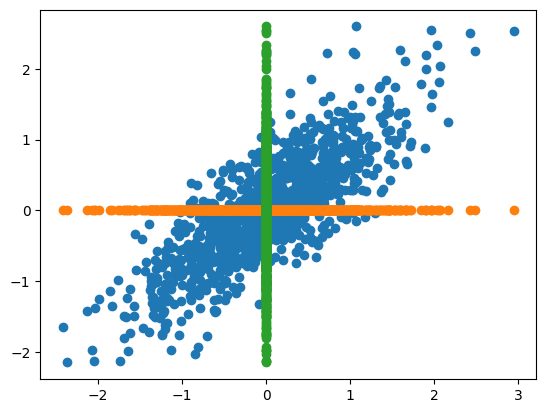

In [51]:
nPoints = len(data)

# Plotar os dados originais em azul
plt.scatter(data[:,0], data[:,1])

# Plotar a projeção ao longo do primeiro componente em laranja
plt.scatter(data[:,0], np.zeros(nPoints))

# Plotar a projeção ao longo do segundo componente em verde
plt.scatter(np.zeros(nPoints), data[:,1])

plt.show()

## PCA como uma estratégia para plotar dados complexos

O próximo gráfico mostra um diagrama de amostra exibindo um conjunto de dados de imagens de gatos e cães. Imagens brutas são compostas por centenas ou até milhares de características. No entanto, a PCA nos permite reduzir essas muitas características para apenas duas. Nesse espaço reduzido de variáveis não correlacionadas, podemos facilmente separar gatos e cães.

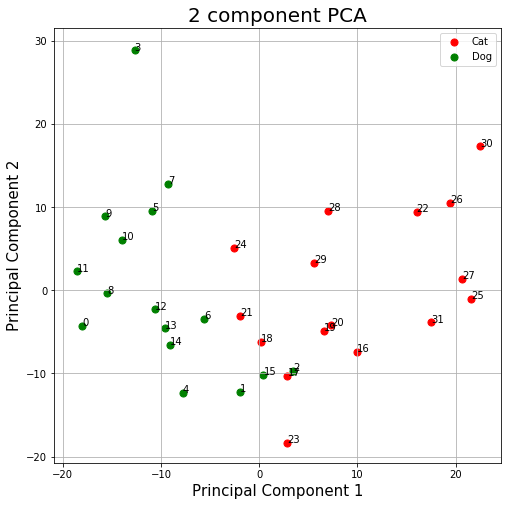

# Vector Space Models

## Prever os Países a partir das Capitais

Durante a apresentação do módulo, ilustramos as analogias de palavras
encontrando a capital de um país a partir do próprio país. Nesta parte da tarefa,
mudamos um pouco o problema. Você deve prever os **países** que correspondem a algumas **capitais**.
Você está jogando trivia contra uma criança da segunda série que acabou de fazer seu teste de geografia e sabe todas as capitais de cor.
Graças ao NLP, você poderá responder corretamente às perguntas. Em outras palavras, você escreverá um programa que pode dar
a você o país pela sua capital. Dessa forma, você tem certeza de que vencerá o jogo de trivia. Começaremos explorando o conjunto de dados.

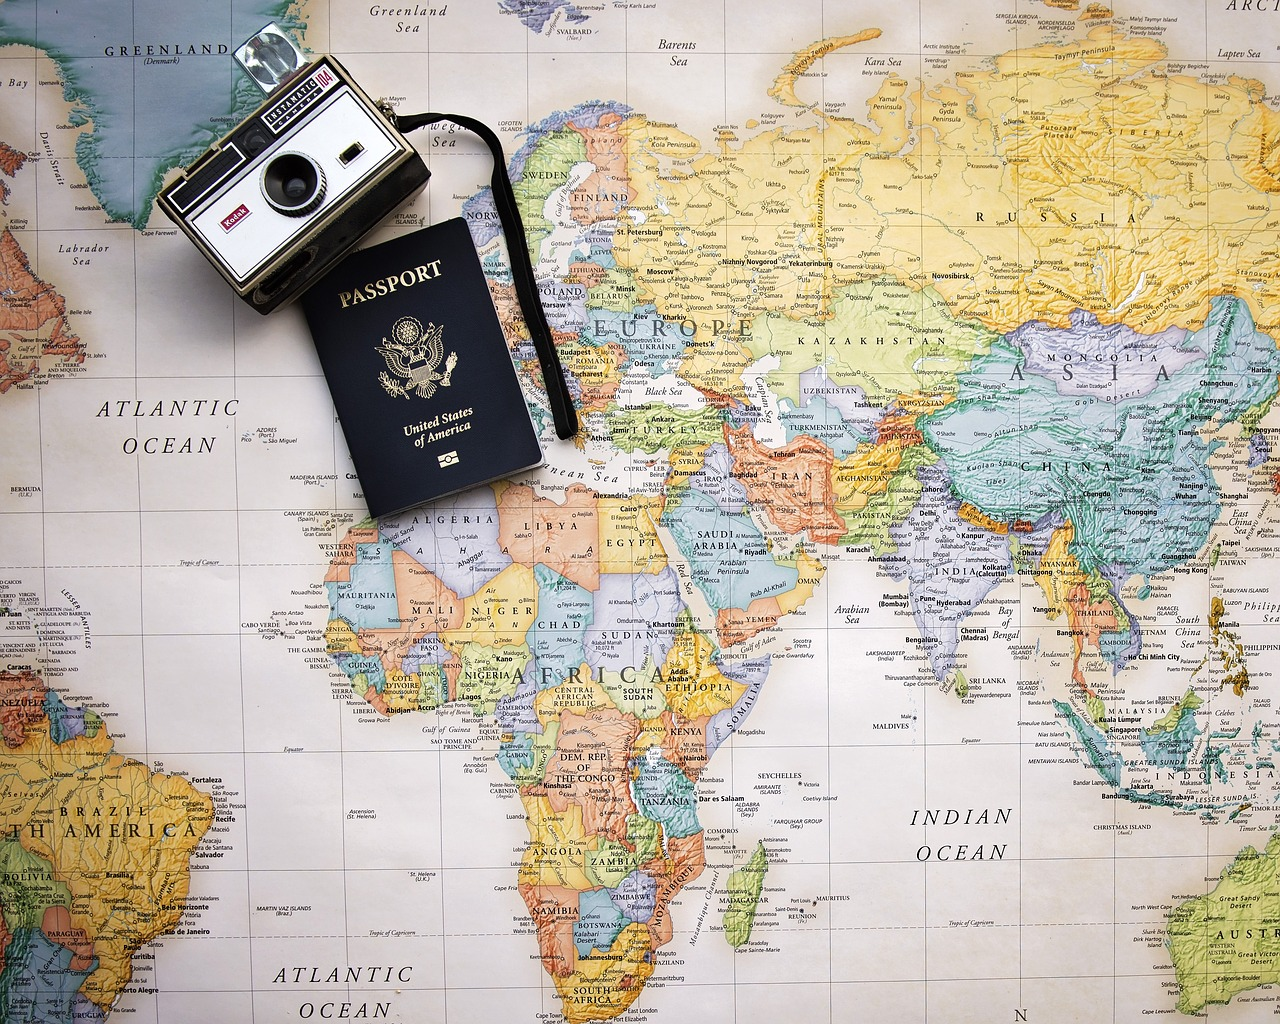

### Importando os Dados

Como de costume, você começa importando algumas bibliotecas essenciais do Python e carregando o conjunto de dados.
O conjunto de dados será carregado como um [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html),
que é um método muito comum em ciência de dados. Devido ao grande tamanho dos dados,
isso pode levar alguns minutos.

In [63]:
# Execute esta célula para importar pacotes.
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('capitals.txt', delimiter=' ')
data.columns = ['city1', 'country1', 'city2', 'country2']

# imprime os primeiros cinco elementos do DataFrame
data.head(5)

city1 country1    city2     country2
0  Athens   Greece  Bangkok     Thailand
1  Athens   Greece  Beijing        China
2  Athens   Greece   Berlin      Germany
3  Athens   Greece     Bern  Switzerland
4  Athens   Greece    Cairo        Egypt

***

#### Para Executar Este Código em Sua Própria Máquina:
Observe que, como o conjunto de dados original de embeddings de palavras do Google News tem cerca de 3,64 gigabytes. Portanto, baixamos o conjunto de dados completo,
extraímos uma amostra das palavras que vamos analisar nesta tarefa e salvamos
em um arquivo pickle chamado `word_embeddings_capitals.p`.

Se você quiser baixar o conjunto de dados completo por conta própria e escolher seu próprio conjunto de embeddings de palavras,
consulte as instruções e algum código auxiliar.

- Baixe o conjunto de dados nesta [página](https://code.google.com/archive/p/word2vec/).
- Procure na página por 'GoogleNews-vectors-negative300.bin.gz' e clique no link para baixar.
- Você precisará descompactar o arquivo.

Copie e cole o código abaixo e execute-o na sua máquina local após baixar
o conjunto de dados para o mesmo diretório do notebook.

```python
import nltk
from gensim.models import KeyedVectors

embeddings = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True)
f = open('capitals.txt', 'r').read()
set_words = set(nltk.word_tokenize(f))
select_words = ['king', 'queen', 'oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']
for w in select_words:
    set_words.add(w)

def get_word_embeddings(embeddings):
    word_embeddings = {}
    for word in embeddings.vocab:
        if word in set_words:
            word_embeddings[word] = embeddings[word]
    return word_embeddings

# Testando sua função
word_embeddings = get_word_embeddings(embeddings)
print(len(word_embeddings))
pickle.dump(word_embeddings, open("word_embeddings_subset.p", "wb"))
```

***

Agora vamos carregar os embeddings de palavras como um [dicionário Python](https://docs.python.org/3/tutorial/datastructures.html#dictionaries).
Como afirmado, esses já foram obtidos através de um algoritmo de aprendizado de máquina.

In [64]:
word_embeddings = pickle.load(open("word_embeddings_subset.p", "rb"))
len(word_embeddings)  # devem haver 243 palavras que serão usadas nesta tarefa

243

Cada embedding de palavra é um vetor de 300 dimensões.

In [65]:
print("dimensão: {}".format(word_embeddings['Spain'].shape[0]))

dimensão: 300


#### Prever relações entre palavras

* A função receberá como entrada três palavras.
* As duas primeiras estão relacionadas entre si.
* Ela preverá uma 4ª palavra que está relacionada à terceira palavra de maneira semelhante à relação entre as duas primeiras palavras.
* Como exemplo, "Atenas é para a Grécia assim como Bangkok é para ______"?
* Você escreverá um programa que é capaz de encontrar a quarta palavra.
* Nós lhe daremos uma dica para mostrar como calcular isso.

Uma analogia similar seria a seguinte:

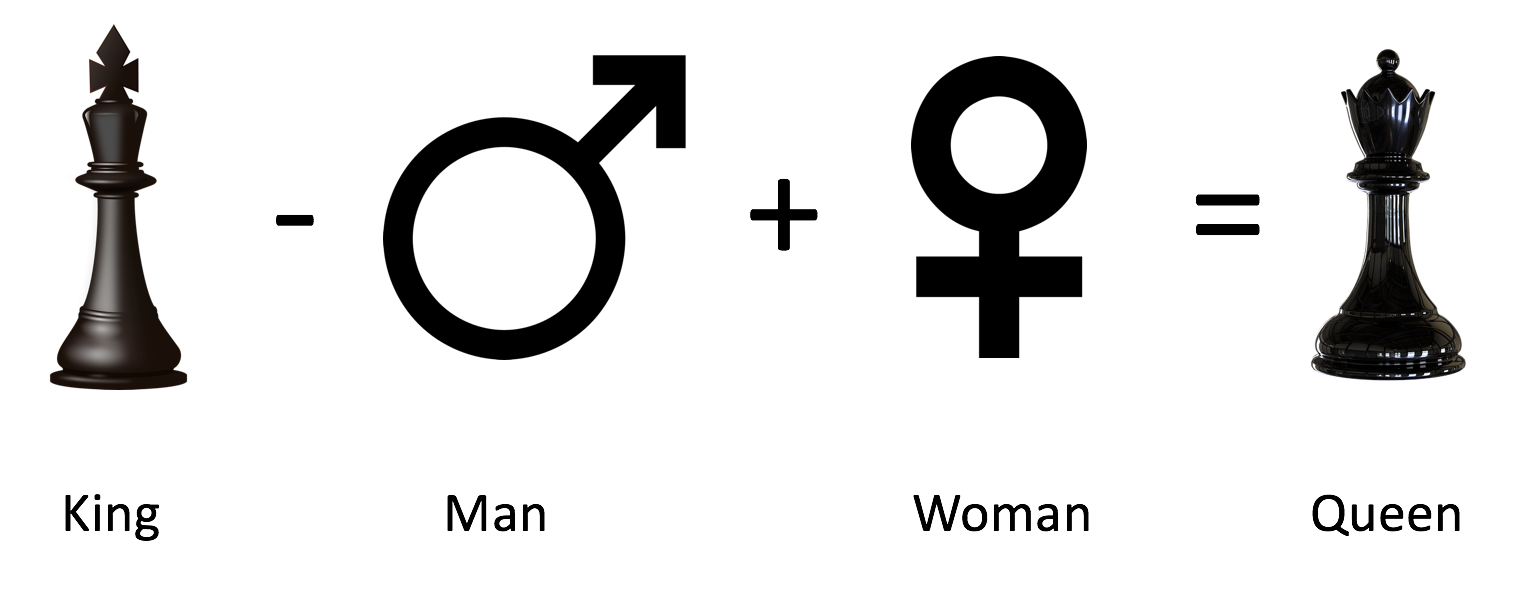



### Similaridade Cosseno

A função de similaridade cosseno é:

$$\cos (\theta)=\frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\|\|\mathbf{B}\|}=\frac{\sum_{i=1}^{n} A_{i} B_{i}}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}}}\tag{1}$$

$A$ e $B$ representam os vetores das palavras e $A_i$ ou $B_i$ representam o índice i desse vetor. Note que se A e B forem idênticos, você obterá $cos(\theta) = 1$.
* Caso contrário, se eles forem totalmente opostos, ou seja, $A = -B$, então você obteria $cos(\theta) = -1$.
* Se você obter $cos(\theta) = 0$, isso significa que eles são ortogonais (ou perpendiculares).
* Números entre 0 e 1 indicam um escore de similaridade.
* Números entre -1 e 0 indicam um escore de dissimilaridade.


### cosine_similarity

In [66]:
def cosine_similarity(A, B):
    '''
    Input:
        A: a numpy array which corresponds to a word vector
        B: A numpy array which corresponds to a word vector
    Output:
        cos: numerical number representing the cosine similarity between A and B.
    '''
    dot = np.dot(A, B)    
    norma = np.linalg.norm(A)
    normb = np.linalg.norm(B)    
    cos = dot / (norma * normb)
    return cos

### Distância Euclidiana


A distância Euclidiana é definida como:

$$ \begin{aligned} d(\mathbf{A}, \mathbf{B})=d(\mathbf{B}, \mathbf{A}) &=\sqrt{\left(A_{1}-B_{1}\right)^{2}+\left(A_{2}-B_{2}\right)^{2}+\cdots+\left(A_{n}-B_{n}\right)^{2}} \\ &=\sqrt{\sum_{i=1}^{n}\left(A_{i}-B_{i}\right)^{2}} \end{aligned}$$

* $n$ é o número de elementos no vetor
* $A$ e $B$ são os vetores das palavras correspondentes. 
* Quanto mais semelhantes as palavras, mais próxima de 0 será a distância Euclidiana. 

### euclidean

In [67]:
def euclidean(A, B):
    """
    Input:
        A: a numpy array which corresponds to a word vector
        B: A numpy array which corresponds to a word vector
    Output:
        d: numerical number representing the Euclidean distance between A and B.
    """
    d = np.linalg.norm(A - B)
   
    return d

### Encontrando o País de Cada Capital

Agora, você usará as funções anteriores para calcular similaridades entre vetores
e usá-las para encontrar as capitais dos países. Você escreverá uma função que
recebe três palavras e o dicionário de embeddings. Sua tarefa é encontrar as
capitais. Por exemplo, dadas as seguintes palavras:

- 1: Atenas 2: Grécia 3: Bagdá,


### get_country

In [68]:
def get_country(city1, country1, city2, embeddings, cosine_similarity=cosine_similarity):
    """
    Input:
        city1: a string (the capital city of country1)
        country1: a string (the country of capital1)
        city2: a string (the capital city of country2)
        embeddings: a dictionary where the keys are words and values are their embeddings
    Output:
        country: a tuple with the most likely country and its similarity score
    """

    # Armazena city1, country1 e city2 em um conjunto chamado group
    group = set((city1, country1, city2))

    # Obtém o embedding de city1
    city1_emb = embeddings[city1]

    # Obtém o embedding de country1
    country1_emb = embeddings[country1]

    # Obtém o embedding de city2
    city2_emb = embeddings[city2]

    # Obtém o embedding de country2 (é uma combinação dos embeddings de country1, city1 e city2)
    # Lembre-se: King - Man + Woman = Queen
    vec = country1_emb - city1_emb + city2_emb

    # Inicializa a similaridade com -1 (será substituída por similaridades que são mais próximas de +1)
    similarity = -1

    # Inicializa country com uma string vazia
    country = ''

    # Loop por todas as palavras no dicionário de embeddings
    for word in embeddings.keys():

        # Primeiro verifica se a palavra não está no 'group'
        if word not in group:

            # Obtém o embedding da palavra
            word_emb = embeddings[word]

            # Calcula a similaridade cosseno entre o embedding de country2 e a palavra no dicionário de embeddings
            cur_similarity = cosine_similarity(vec, word_emb)

            # Se a similaridade cosseno for mais semelhante do que a similaridade anteriormente melhor...
            if cur_similarity > similarity:

                # Atualiza a similaridade para a nova, melhor similaridade
                similarity = cur_similarity

                # Armazena o país como uma tupla, que contém a palavra e a similaridade
                country = (word, similarity)

    return country

In [69]:
# Testando sua função, note que para torná-la mais robusta você pode retornar as 5 palavras mais semelhantes.
print(get_country('Athens', 'Greece', 'Cairo', word_embeddings))

('Egypt', 0.7626821)


### Precisão do Modelo


$$\text{Precisão} = \frac{\text{Número de previsões corretas}}{\text{Número total de previsões}}$$

### get_accuracy

In [70]:
def get_accuracy(word_embeddings, data, get_country=get_country):
    '''
    Input:
        word_embeddings: um dicionário onde a chave é uma palavra e o valor é seu embedding
        data: um DataFrame pandas contendo todos os pares de países e capitais
    '''

    # inicializar o número de corretos como zero
    num_correct = 0

    # iterar pelas linhas do dataframe
    for i, row in data.iterrows():
        # obter city1
        city1 = row['city1']

        # obter country1
        country1 = row['country1']

        # obter city2
        city2 = row['city2']

        # obter country2
        country2 = row['country2']

        # usar get_country para encontrar o country2 previsto
        predicted_country2, _ = get_country(city1, country1, city2, word_embeddings)

        # se o country2 previsto for o mesmo que o country2 real...
        if predicted_country2 == country2:
            # incrementar o número de corretos em 1
            num_correct += 1

    # obter o número de linhas no dataframe de dados (comprimento do dataframe)
    m = len(data)

    # calcular a precisão dividindo o número de corretos por m
    accuracy = num_correct / m
    return accuracy

In [71]:
accuracy = get_accuracy(word_embeddings, data)
print(f"Accuracy is {accuracy:.2f}")

Accuracy is 0.92


## Plotando os Vetores Usando PCA

Agora vamos explorar a distância entre os vetores de palavras após reduzir sua dimensão. A técnica que usaremos é conhecida como [*análise de componentes principais* (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis). Como vimos, estamos trabalhando em um espaço de 300 dimensões neste caso. Embora do ponto de vista computacional tenhamos conseguido realizar um bom trabalho, é impossível visualizar os resultados em espaços de dimensão tão alta.

Podemos pensar no PCA como um método que projeta nossos vetores em um espaço de dimensão reduzida, mantendo o máximo de informações sobre os vetores originais em suas contrapartes reduzidas. Neste caso, por *máxima informação* queremos dizer que a distância euclidiana entre os vetores originais e seus equivalentes projetados é mínima. Assim, vetores que originalmente estavam próximos no dicionário de embeddings, produzirão vetores de dimensão reduzida que ainda estão próximos uns dos outros.

Ao mapear as palavras, palavras semelhantes serão agrupadas próximas umas das outras. Por exemplo, as palavras 'sad', 'happy', 'joyful' descrevem emoções e devem estar próximas umas das outras quando plotadas. As palavras: 'oil', 'gas' e 'petroleum' descrevem recursos naturais. Palavras como 'city', 'village', 'town' podem ser vistas como sinônimos e descrevem coisas semelhantes.

Antes de plotar as palavras, precisamos primeiro reduzir cada vetor de palavra com PCA para 2 dimensões e, em seguida, plotá-las. As etapas para calcular o PCA são as seguintes:

1. Normalizar os dados em média
2. Calcular a matriz de covariância dos seus dados ($\Sigma$).
3. Calcular os autovetores e os autovalores da sua matriz de covariância
4. Multiplicar os primeiros K autovetores pelos seus dados normalizados. A transformação deve ser algo como o seguinte:

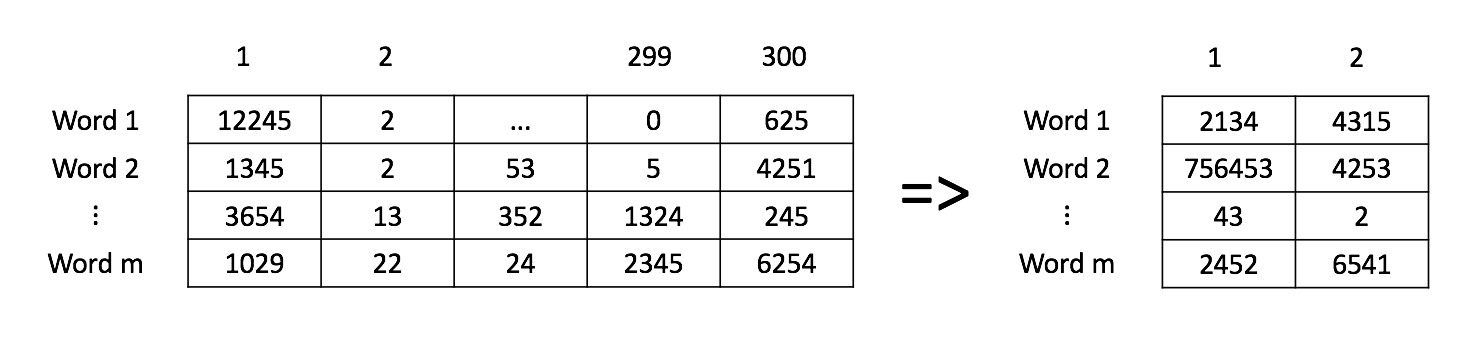

### compute_pca

**Instruções**: 

* Os vetores de palavras são de dimensão 300. 
* Use PCA para alterar as 300 dimensões para `n_components` dimensões. 
* A nova matriz deve ter dimensão `m, n_components`. 

* Primeiro, remova a média dos dados
* Obtenha os autovalores usando `linalg.eigh`. Use 'eigh' em vez de 'eig' porque R é simétrica. O ganho de desempenho ao usar eigh em vez de eig é substancial.
* Classifique os autovetores e autovalores pela ordem decrescente dos autovalores.
* Obtenha um subconjunto dos autovetores (escolha quantos componentes principais deseja usar com `n_components`).
* Retorne a nova transformação dos dados multiplicando os autovetores pelos dados originais.


In [72]:
def compute_pca(X, n_components=2):
    """
    Input:
        X: de dimensão (m, n) onde cada linha corresponde a um vetor de palavras
        n_components: Número de componentes que você deseja manter.
    Output:
        X_reduced: dados transformados em n_components dimensões/colunas + dados originais regenerados
    """
   
    # remova a média dos dados
    X_demeaned = X - np.mean(X, axis=0)

    # calcule a matriz de covariância
    covariance_matrix = np.cov(X_demeaned, rowvar=False)

    # calcule autovetores e autovalores da matriz de covariância
    eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix)

    # classifique os autovalores em ordem crescente (obtenha os índices da classificação)
    idx_sorted = np.argsort(eigen_vals)
    
    # inverta a ordem para que seja do maior para o menor
    idx_sorted_decreasing = idx_sorted[::-1]

    # classifique os autovalores por idx_sorted_decreasing
    eigen_vals_sorted = eigen_vals[idx_sorted_decreasing]

    # classifique os autovetores usando os índices idx_sorted_decreasing
    eigen_vecs_sorted = eigen_vecs[:, idx_sorted_decreasing]

    # selecione os primeiros n autovetores (n é a dimensão desejada
    # do array de dados reescalados, ou n_components)
    eigen_vecs_subset = eigen_vecs_sorted[:, :n_components]

    # transforme os dados multiplicando a transposição dos autovetores pela transposição dos dados sem a média
    # Então, tome a transposição desse produto.
    X_reduced = np.dot(X_demeaned, eigen_vecs_subset)

    return X_reduced

In [73]:
# Testando sua função
np.random.seed(1)
X = np.random.rand(3, 10)
X_reduced = compute_pca(X, n_components=2)
print("Your original matrix was " + str(X.shape) + " and it became:")
print(X_reduced)

Your original matrix was (3, 10) and it became:
[[ 0.43437323  0.49820384]
 [ 0.42077249 -0.50351448]
 [-0.85514571  0.00531064]]


A saída esperada é:

```
Your original matrix was (3,10) and it became:
[[ 0.43437323  0.49820384]
 [ 0.42077249 -0.50351448]
 [-0.85514571  0.00531064]]
```

Agora, você pode usar sua função `compute_pca` para plotar algumas palavras selecionadas. Você verá que palavras semelhantes tendem a estar agrupadas próximas umas das outras. Às vezes, até mesmo antônimos tendem a estar agrupados próximos uns dos outros. Antônimos descrevem a mesma coisa, mas apenas tendem a estar no outro extremo da escala. Eles geralmente são encontrados no mesmo local de uma frase, têm as mesmas partes do discurso e, assim, ao aprender os vetores de palavras, você acaba obtendo pesos semelhantes. Na próxima semana, vamos abordar como aprendê-los, mas por enquanto, vamos apenas aproveitar o uso deles.


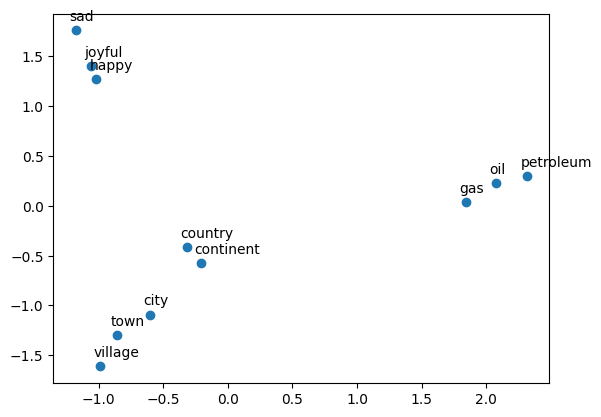

In [76]:
# Lista de palavras selecionadas
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']

# Função para obter os vetores de palavras
def get_vectors(word_embeddings, words):
    return np.array([word_embeddings[word] for word in words])

# Obtendo os vetores de palavras
X = get_vectors(word_embeddings, words)

# Reduzindo a dimensionalidade para 2 usando PCA
result = compute_pca(X, 2)

# Criando o gráfico
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0] - 0.05, result[i, 1] + 0.1))

plt.show()

**O que você notou?**

Os vetores de palavras para "gas", "oil" e "petroleum" aparecem relacionados entre si, pois seus vetores estão próximos uns dos outros. Da mesma forma, "sad", "joyful" e "happy" expressam emoções e também estão próximos uns dos outros no gráfico.